<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Beginner%20friendly%20networks/First_example_of_a_CNN_with_the_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN with the MNIST dataset

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai


## Import of libraries

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import tensorflow.keras as keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

#from tensorflow.keras.utils import np_utils # To transform labels in categorical
import np_utils
from tensorflow.keras.datasets import mnist # To load the dataset
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras import backend as K
#K.tensorflow_backend.set_image_dim_ordering('tf') # To tell TensorFlow the right order of dims


In [5]:
# Just to set some standard plot format
import matplotlib as mpl
mpl.style.use('classic')

## Preparation of the data

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples


In [11]:
nClasses = 10
y_train = to_categorical(y_train,nClasses)
y_test = to_categorical(y_test,nClasses)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(60000, 10)
(28, 28, 1)


Let's look at some of the images to get an idea on how they looks like.

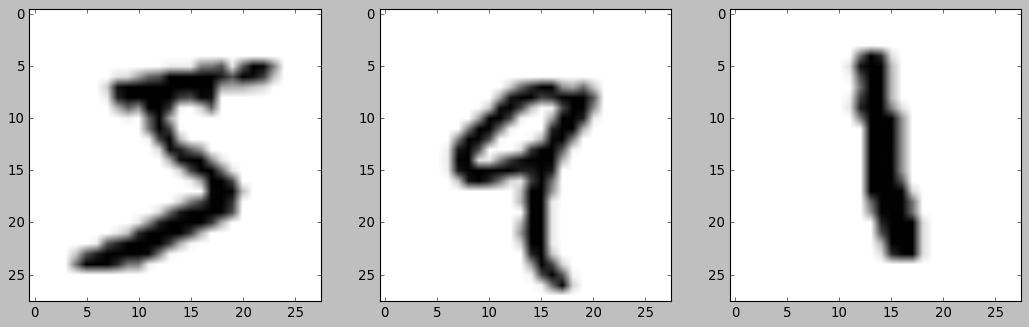

In [13]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0].squeeze(), cmap='gray_r')
fig.add_subplot(1,3,2)
plt.imshow(x_train[4].squeeze(), cmap='gray_r')
fig.add_subplot(1,3,3)
plt.imshow(x_train[6].squeeze(), cmap='gray_r')

## Neural Network Model

### Creation of the model

In [29]:
num_classes = 10
def createModel():
    model = Sequential()
    model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
     
    return model

In [30]:
K.clear_session()
model = createModel()

In [31]:
AdamOpt = Adam(lr=0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=AdamOpt,
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### Training of the network

In [33]:
batch_size = 256
epochs = 3

CC = CustomCallback()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/10


2023-10-02 15:56:22.301271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2720 - accuracy: 0.9160

2023-10-02 15:56:40.932819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 22s 81ms/step - loss: 0.2720 - accuracy: 0.9160 - val_loss: 0.0565 - val_accuracy: 0.9809
Epoch 2/10
129/235 [===============>..............] - ETA: 6s - loss: 0.0911 - accuracy: 0.9724

KeyboardInterrupt: 

## Plots

Text(0, 0.5, 'Loss')

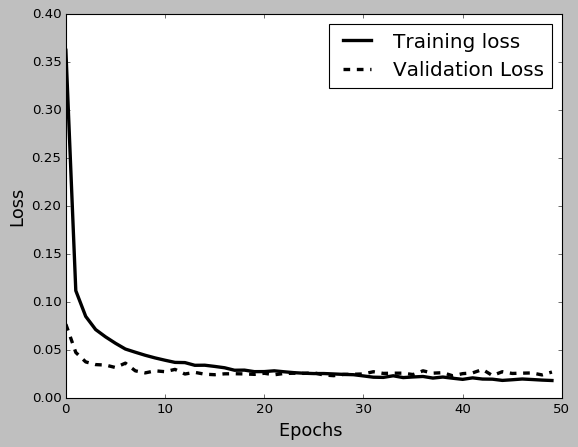

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

#plt.savefig('loss.png', bbox_inches='tight', dpi = 300)
#files.download('loss.png')

Text(0, 0.5, 'Accuracy')

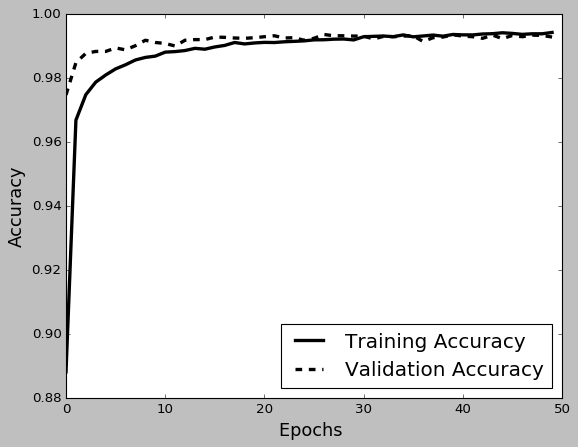

In [ ]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

#plt.savefig('accuracy.png', bbox_inches='tight', dpi = 300)
#files.download('accuracy.png')